# Budget Analysis

---

## Environment Setup

In [249]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [251]:
# Set environment variables from the .env file
load_dotenv()

True

In [252]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [253]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
print(PLAID_CLIENT_ID)

5f0f2135c2c21f0012bf4737


In [254]:
client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': '28s0TigPqY6nc7J',
 'total': 11376}

In [255]:
# Set the institution id
INSTITUTION_ID = "ins_109508"


### 2. Generate a public token

In [256]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])

# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-e63c8fa4-4a30-4a4e-b748-9234caaf0295', 'request_id': 'QpKLJkSlawbdUlA'}


### 3. Exchange the public token for an access token

In [257]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke
print(exchange_response)

{'access_token': 'access-sandbox-c51d5d59-2c0a-4119-800d-90f83e22d4ca', 'item_id': 'jqL7m95aXmsAne6QBDZ4iG4brBGyz9u1qa6lk', 'request_id': 'ZSATSbcjW1wpqrU'}


In [258]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [259]:
# Retrieve accounts & Print
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'VeZqyjL9GyH5keB38DzWiKJyQNz1nRfWEjP1p',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'w7RqXGlo9XUVk1znA58aCpPR4oyBxLfrm4owl',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '5Qn5MBbjGMUErnyBpPjvtAZporW7egTZ8a7lg',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [260]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())


# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions
print(json.dumps(transaction_response['transactions'][:2], indent=4, sort_keys=True))

[
    {
        "account_id": "JrwVNqxmRNu5Arw7q9aoi5XKDRqgrafdklg31",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-07-24",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Tectra Inc",
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
  

### 2. Print the categories for each transaction

In [261]:
# Create a for-loop to print the categories for each transaction
for transactions in transaction_response['transactions']:
     
        print(json.dumps(transactions['category'], indent=4, sort_keys=True))
          

[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
 

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [262]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
client_df = pd.DataFrame() 


# Retrieve all the transactions
name = []
date = []
amount = []
category = []

for transactions in transaction_response['transactions']:
    name.append(transactions['name'])
    date.append(transactions['date'])
    amount.append(transactions['amount'])
    category.append(transactions['category'][0])

# Populate the transactions DataFrame with the transactions data   
client_df['name'] = name
client_df['date'] = date
client_df['amount'] = amount
client_df['category'] = category

# Display sample data from the DataFrame    
#(columns=['date', 'name', 'amount', 'catagory'])
client_df.head()

,name,date,amount,category
0,Tectra Inc,2020-07-24,500.0,Food and Drink
1,AUTOMATIC PAYMENT - THANK,2020-07-23,2078.5,Payment
2,KFC,2020-07-23,500.0,Food and Drink
3,Madison Bicycle Shop,2020-07-23,500.0,Shops
4,CREDIT CARD 3333 PAYMENT *//,2020-07-14,25.0,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [263]:
# Display data types
client_df.dtypes

name         object
date         object
amount      float64
category     object
dtype: object

In [264]:
# Set Index to Date
client_df['date'] = pd.to_datetime(client_df['date'])
client_df.set_index('date', inplace=True)

In [265]:
# Print Dataframe
client_df

,name,amount,category
date,,,
2020-07-24,Tectra Inc,500.00,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-07-23,KFC,500.00,Food and Drink
2020-07-23,Madison Bicycle Shop,500.00,Shops
2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-07-14,Uber 063015 SF**POOL**,5.40,Travel
2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-07-13,CD DEPOSIT .INITIAL.,1000.00,Transfer
2020-07-12,Touchstone Climbing,78.50,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [266]:
# Fetch the income data
income_response = client.Income.get(access_token)

# Print the income data
print(json.dumps(income_response, indent=4, sort_keys=True))

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "abPZcbJiuddushl"
}


In [267]:
# Determine the previous year's gross income and print the result
income_response['income']['last_year_income_before_tax']

7285

In [268]:
# Determine the current monthly income and print the results
income_response['income']['income_streams'][0]['monthly_income']

500

In [269]:
# Determine the projected yearly income and print the results
income_response['income']['projected_yearly_income']

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [270]:
# Compute the total expenses per category
client_exp = client_df.groupby('category').sum()

# Display the expenses per catefory
client_exp

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


In [271]:
#Total number of transactions per expense category
client_num_exp = client_df.groupby('category').count()['name']
print(client_num_exp)

category
Food and Drink    15
Payment            6
Recreation         3
Shops              3
Transfer           9
Travel            12
Name: name, dtype: int64


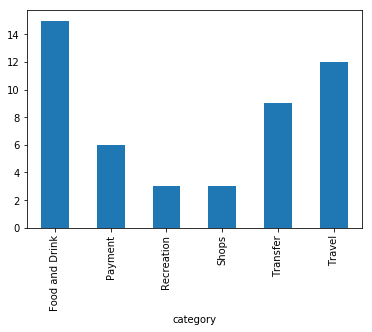

In [272]:
#Print bar chart of expenses
client_num_exp.plot.bar()

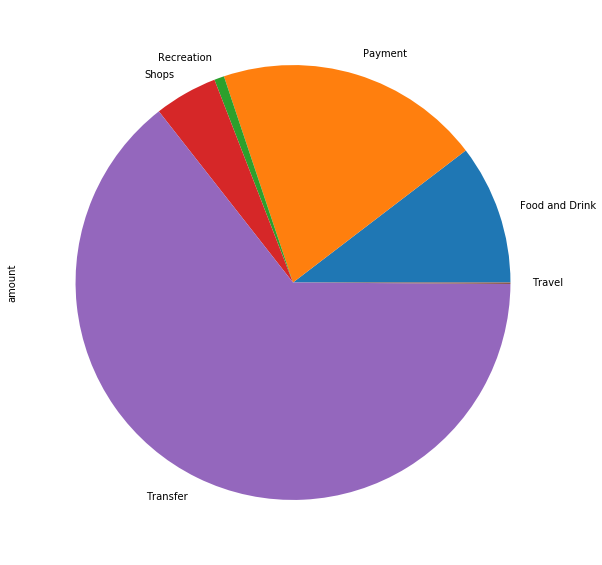

In [273]:
# Create a spending categories pie chart.
client_exp['amount'].plot.pie(figsize=(20,10))

### Calculate the expenses per month

In [274]:
# Create a DataFrame with the total expenses
client_exp_month = client_df.groupby(client_df.index.month).sum()

# Display sample data
client_exp_month.head()

,amount
date,
4,506.33
5,10645.24
6,10645.24
7,10138.91


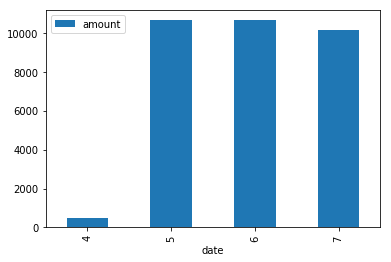

In [275]:
# Create a spending per month bar chart
client_exp_month.plot.bar()